<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
#display(data.head())
print(data.info())
#print(sorted(data['floors_total'].unique()))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Вывод

В столбцах ponds_around3000 и parks_around3000 вместо NaN можно поставить 0,скорее всего их нет и в обьявление не указали. 
Также в стобце balcony можно вместо NaN можно поставить 0.
В столбце ceiling_height тоже есть значения NaN, но их трогать не будем, потому что это параметр нельзя заменить на 0 или средним.
В столбце living_area и kitchen_area также имеються пропуски, пока их оставим и не будем менять.
В столбце airports_nearest тоже есть пропуски, их оставляем, не понятно с дальностью до аэропортов.
В столбце days_exposition есть пропуски, но их не трогаем, предпологаяя что обьявление еще висит.

## Предобработка данных

В столбце is_apartment булев тип данных и есть пропуски, нужно заменить на int, где True будет равно 1, False = 0, все Nan заменим нулями.
Столбец cityCenters_nearest переведем из float в in.

In [3]:
# заменим пропуски в столбце ponds_around3000 нулями.
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
# заменим пропуски в столбце parks_around3000 нулями.
data['parks_around3000'] = data['parks_around3000'].fillna(0)
# заменим пропуски в столбце balcony нулями.
data['balcony'] = data['balcony'].fillna(0)
# столбец 'first_day_exposition' приведем к фрмату to_datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format='%Y-%m-%d')
# заменим пропуски в столбце is_apartment нулями.
data['is_apartment'] = data['is_apartment'].fillna(0)
# переведем столбцы: is_apartment, balcony, cityCenters_nearest, parks_around3000, ponds_around3000, floors_total в int.
data = data.astype(
    {'is_apartment':int, 'balcony':int, 'parks_around3000':int, 'ponds_around3000':int}
)

data[data.select_dtypes(np.float64).columns] = data.select_dtypes(np.float64).astype(np.float32)
display(data.head())
print(data.info())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.000000,2019-03-07,3,2.70,16.0,51.000000,8,0,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000.0,40.400002,2018-12-04,1,NaN,11.0,18.600000,1,0,...,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000.0,56.000000,2015-08-20,2,NaN,5.0,34.299999,4,0,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000.0,159.000000,2015-07-24,3,NaN,14.0,NaN,9,0,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000.0,100.000000,2018-06-19,2,3.03,14.0,32.000000,13,0,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float32       
 2   total_area            23699 non-null  float32       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float32       
 6   floors_total          23613 non-null  float32       
 7   living_area           21796 non-null  float32       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  int64         
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float32       
 13  balcony         

## Расчёты и добавление результатов в таблицу

# Находим стоимость квадратного метра жилья.

In [4]:
data['m2_price'] = data['last_price'] / data['total_area']

# Находим и строим таблицу, по дням, месяцу и году

In [5]:
# Преобразуем данные столбца first_day_exposition, оставив только день, месяц и год, потому что время нулевое.
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format='%Y-%m-%d')

data['day_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year

display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,m2_price,day_exposition,month_exposition,year_exposition
0,20,13000000.0,108.000000,2019-03-07,3,2.70,16.0,51.000000,8,0,...,16028.0,1,482.0,2,755.0,NaN,120370.367188,3,3,2019
1,7,3350000.0,40.400002,2018-12-04,1,NaN,11.0,18.600000,1,0,...,18603.0,0,NaN,0,NaN,81.0,82920.789062,1,12,2018
2,10,5196000.0,56.000000,2015-08-20,2,NaN,5.0,34.299999,4,0,...,13933.0,1,90.0,2,574.0,558.0,92785.710938,3,8,2015
3,0,64900000.0,159.000000,2015-07-24,3,NaN,14.0,NaN,9,0,...,6800.0,2,84.0,3,234.0,424.0,408176.093750,4,7,2015
4,2,10000000.0,100.000000,2018-06-19,2,3.03,14.0,32.000000,13,0,...,8098.0,2,112.0,1,48.0,121.0,100000.000000,1,6,2018
5,10,2890000.0,30.400000,2018-09-10,1,NaN,12.0,14.400000,5,0,...,NaN,0,NaN,0,NaN,55.0,95065.789062,0,9,2018
6,6,3700000.0,37.299999,2017-11-02,1,NaN,26.0,10.600000,6,0,...,19143.0,0,NaN,0,NaN,155.0,99195.710938,3,11,2017
7,5,7915000.0,71.599998,2019-04-18,2,NaN,24.0,NaN,22,0,...,11634.0,0,NaN,0,NaN,NaN,110544.695312,3,4,2019
8,20,2900000.0,33.160000,2018-05-23,1,NaN,27.0,15.430000,26,0,...,NaN,0,NaN,0,NaN,189.0,87454.765625,2,5,2018
9,18,5400000.0,61.000000,2017-02-26,3,2.50,9.0,43.599998,7,0,...,15008.0,0,NaN,0,NaN,289.0,88524.593750,6,2,2017


# Изучем этажность, соотношение жилой и общей площади, также площади кухни к общей

In [6]:
#напишем функцию категоризации по этажам, используя метод apply применимо к каждой строке датафрейма через axis = 1
def floor_total_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    return 'другой'
    
#категоризуем этажи с помощью метода apply применимо к каждой строке датафрейма через axis = 1  
data['floor_total_category'] = data.apply(floor_total_category, axis=1)
print(data['floor_total_category'].value_counts())

другой       17446
последний     3336
первый        2917
Name: floor_total_category, dtype: int64


In [7]:
# соотношение жилой и общей площади
data['liv_total_area'] = data['living_area'] / data['total_area']
# отношение площади кухни к общей
data['kit_total_area'] = data['kitchen_area'] / data ['total_area']

# Изучим следующие параметры: площадь, цена, число комнат, высота потолков

count    23699.000000
mean        60.348648
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900002
max        900.000000
Name: total_area, dtype: float64
count        23699.0
mean       6541548.5
std       10887013.0
min          12190.0
25%        3400000.0
50%        4650000.0
75%        6800000.0
max      763000000.0
Name: last_price, dtype: float64
count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64
count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64
Медианное значение: 95.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,m2_price,day_exposition,month_exposition,year_exposition,floor_total_category,liv_total_area,kit_total_area
0,20,13000000.0,108.000000,2019-03-07,3,2.70,16.0,51.000000,8,0,...,2,755.0,NaN,120370.367188,3,3,2019,другой,0.472222,0.231481
1,7,3350000.0,40.400002,2018-12-04,1,NaN,11.0,18.600000,1,0,...,0,NaN,81.0,82920.789062,1,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.000000,2015-08-20,2,NaN,5.0,34.299999,4,0,...,2,574.0,558.0,92785.710938,3,8,2015,другой,0.612500,0.148214
3,0,64900000.0,159.000000,2015-07-24,3,NaN,14.0,NaN,9,0,...,3,234.0,424.0,408176.093750,4,7,2015,другой,NaN,NaN
4,2,10000000.0,100.000000,2018-06-19,2,3.03,14.0,32.000000,13,0,...,1,48.0,121.0,100000.000000,1,6,2018,другой,0.320000,0.410000


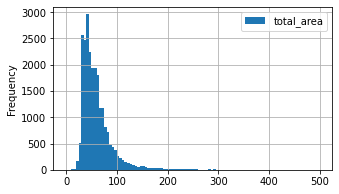

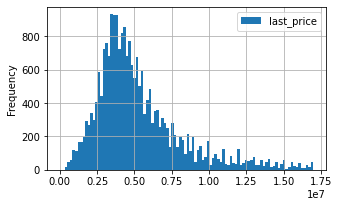

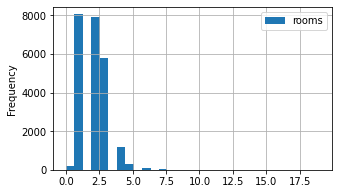

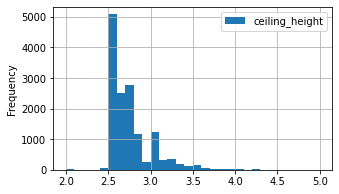

In [8]:
#изучены следующие параметры: площадь, цена, число комнат, высота потолков
print(data['total_area'].describe())

print(data['last_price'].describe())

print(data['rooms'].describe())

print(data['ceiling_height'].describe())
# построили гистограмму для этих параметров
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,500))

data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,17000000))

data.plot(y = 'rooms', kind = 'hist', bins = 30, grid=True, figsize = (5,3))

data.plot(y = 'ceiling_height', kind = 'hist', bins = 30, grid=True, figsize = (5,3), range = (2,5))

print('Медианное значение:', data['days_exposition'].median())
#print(data['days_exposition'].describe())
display(data.head())

# Изучим время продажи квартиры

count    20518.000000
mean       180.888641
std        219.727982
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

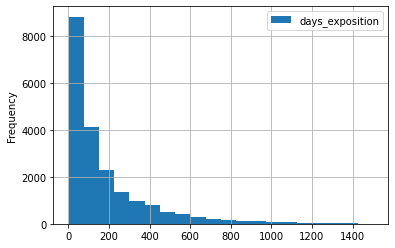

In [9]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 20, grid = True, range = (1,1500))
#data.plot(y = 'days_exposition', kind = 'hist', bins = 50, grid = True, range = (1,1000))

data[data['days_exposition']!=0]['days_exposition'].describe()

#data[data['days_exposition']!=0]['days_exposition'].value_counts()
#print(data['days_exposition'])

Вывод: Среднее значение - 180 дней, а медиана - 95 дней.Большое количество проданных квартир в 45,60,7,30 и 90 дней.

# Уберем редкие и выбивающиеся данные

count    19923.000000
mean       155.976410
std        165.082443
min          3.000000
25%         44.000000
50%         91.000000
75%        212.000000
max        800.000000
Name: days_exposition, dtype: float64

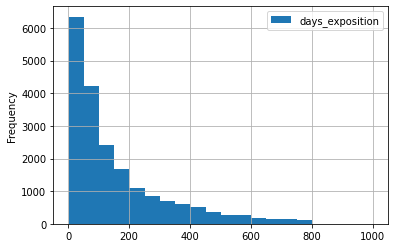

In [10]:
#print(data['days_exposition'].value_counts().head(10))
#Предположим что продажа кварртир свыше 800 дней аномальным и уберем эти значения, 
#так же уберем значения меньше трех дней,не кажеться что в течение 3х дней она могла продасться
new_days = data.query('days_exposition <= 800 and days_exposition >= 3')

new_days.plot(y = 'days_exposition', kind = 'hist', bins = 20, grid = True, range = (1,1000))
#new_days.plot(y = 'days_exposition', kind = 'hist', bins = 50, grid = True, range = (1,1000))

new_days['days_exposition'].describe()
#new_days['days_exposition'].value_counts()

Вывод:После того как убрали аномальные значения медиана теперь 91,  а среднее значение 155.

# Рассмотрим аномальные явления в столбцах площади, цены, числа комнат и высоты потолков

count    23445.000000
mean        58.227680
std         26.509516
min         20.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        200.000000
Name: total_area, dtype: float64

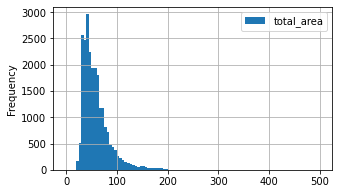

In [11]:
# Уберем значения в плоощади квартир больше 200 квадратных метров и меньше 20, они редкие и не отражают основную картину.
new_total_area = data.query('20 <= total_area <= 200')
new_total_area.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,500))
new_total_area['total_area'].describe()

count       22495.00
mean      5161535.00
std       2715754.75
min         12190.00
25%       3366965.00
50%       4500000.00
75%       6300000.00
max      15000000.00
Name: last_price, dtype: float64

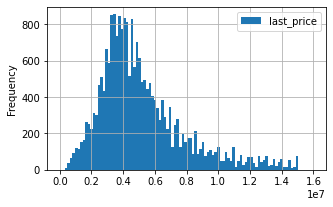

In [12]:
# Уберем значения свыше 15млн рублей, они редкие и выпадают из общих данных
new_last_price = data.query('last_price <= 15000000')
new_last_price.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,16000000))
new_last_price['last_price'].describe()

count    22981.000000
mean         2.005526
std          0.899190
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          4.000000
Name: rooms, dtype: float64

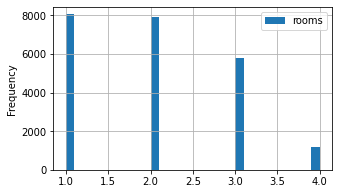

In [13]:
# Уберем значение комнат равных 0 и больше 5,это редкие и выпадающие значения.
new_rooms = data.query('1 <= rooms < 5')
new_rooms.plot(y = 'rooms', kind = 'hist', bins = 30, grid=True, figsize = (5,3))
new_rooms['rooms'].describe()

count    13997.000000
mean         2.698866
std          0.210119
min          2.500000
25%          2.500000
50%          2.650000
75%          2.800000
max          3.490000
Name: ceiling_height, dtype: float64

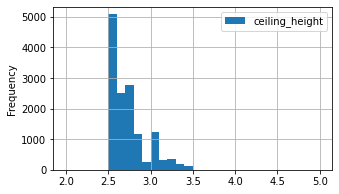

In [14]:
# Ограничем высоту потолков между 2,5 и 3,5 метрами, остальные значения несущественны и выпадают из общего.
new_ceiling_height = data.query('2.5 <= ceiling_height < 3.5')
new_ceiling_height.plot(y = 'ceiling_height', kind = 'hist', bins = 30, grid=True, figsize = (5,3), range = (2,5))
new_ceiling_height['ceiling_height'].describe()

## Исследовательский анализ данных

# Изучим зависимость стоимости квартиры от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также зависимость от даты размещения: дня недели, месяца и года.

0.3019602097609517

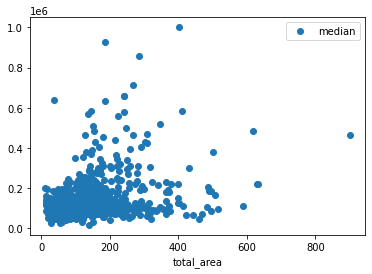

In [15]:
# Зависимость от квадратного метра
total_area_table = data.pivot_table(index = 'total_area', values = 'm2_price', aggfunc = ['mean', 'count', 'median'])
total_area_table.columns = ['mean', 'count', 'median']
total_area_table.plot(y = 'median', style = 'o')

total_area_table.sort_values('median', ascending = False)

data['total_area'].corr(data['m2_price'])

Вывод: стоимость квартиры меняеться в цене с увеличением квадратного метра.

In [16]:
data['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

# Зависимость от количества комнат

0.055419655824170334

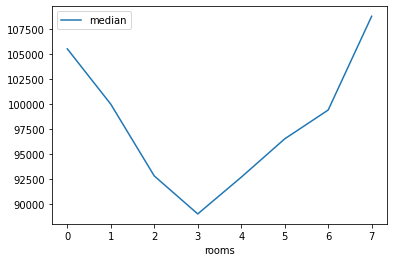

In [17]:
# Зависимость от количества комнат

rooms_table = data.pivot_table(index = 'rooms', values = 'm2_price', aggfunc = ['mean', 'count', 'median'])
rooms_table.columns = ['mean', 'count', 'median']
rooms_table.query('count > 20').plot(y = 'median')

rooms_table.query('count > 20').sort_values('median', ascending = False)


data['rooms'].corr(data['m2_price'])

Вывод: квартиры с 3мя комнатами имеет меньшую стоимость.

# Зависимость от этажности

<AxesSubplot:xlabel='floor_total_category'>

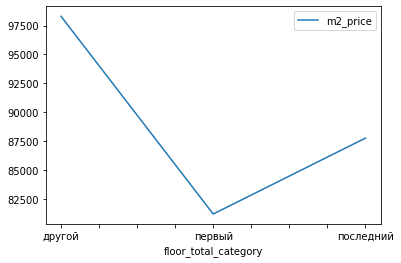

In [18]:
# Зависимость от этажа первый или последний
floor_category_table = data.pivot_table(
    index = 'floor_total_category', values = 'm2_price', aggfunc = ['mean', 'count', 'median']
)
floor_category_table.plot(y = 'median')

# Зависимость удаленности от центра

-0.31795077146266576

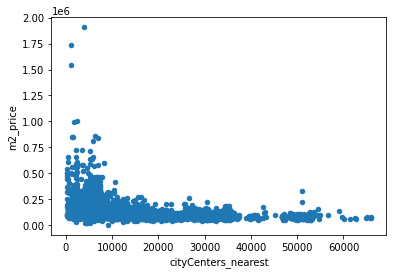

In [19]:
# Зависимость от удаленности от центра
data.plot(y = 'm2_price', x = 'cityCenters_nearest', kind = 'scatter')

data['cityCenters_nearest'].corr(data['m2_price'])

Вывод: Чем ближе к центру, тем выше стоимость стоимость квадрратного метра.

# Зависимость от дня продажи квартиры

,mean,count,median
day_exposition,,,
1,99734.539062,4183,95634.101562
2,99617.179688,3974,95473.812500
3,100162.906250,4295,95143.890625
0,99438.429688,3612,94688.906250
4,99012.140625,4000,94616.156250
6,97708.375000,1699,94501.718750
5,99018.171875,1936,93545.718750


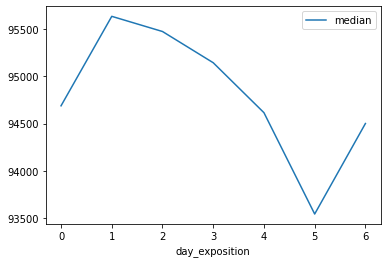

In [20]:
day_exposition_table = data.pivot_table(index = 'day_exposition', values = 'm2_price', aggfunc = ['mean', 'count', 'median'])
day_exposition_table.columns = ['mean', 'count', 'median']
day_exposition_table.plot(y = 'median')
day_exposition_table.sort_values('median', ascending = False)

Вывод: Самая высокая стоимость выставленных обьявлений во вторник, самая низкая в субботу.

# Зависимость от месяца продажи квартиры

,mean,count,median
month_exposition,,,
4,101949.023438,2379,96451.609375
8,100110.531250,1744,96026.312500
9,100464.273438,1981,95607.234375
11,99230.867188,2371,95588.234375
3,98973.218750,2587,95238.093750
1,99862.578125,1500,95222.437500
2,98768.734375,2640,95000.000000
7,99625.640625,1695,95000.000000
12,99574.726562,1641,94262.296875


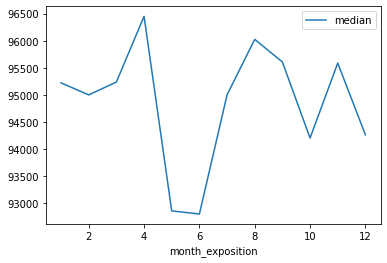

In [21]:
month_exposition_table = data.pivot_table(index = 'month_exposition', values = 'm2_price', aggfunc = ['mean', 'count', 'median'])
month_exposition_table.columns = ['mean', 'count', 'median']
month_exposition_table.plot(y = 'median')
month_exposition_table.sort_values('median', ascending = False)

Вывод: Самое большая стоимость в апреле, а самое низкое в мае и июне.

# Зависимость от года продажи квартиры

,mean,count,median
year_exposition,,,
2014,124830.429688,137,107000.000000
2019,107123.781250,2879,103305.789062
2018,97773.554688,8519,95689.656250
2015,104614.203125,1191,93414.632812
2017,97621.875000,8190,92565.093750
2016,98322.343750,2783,91743.117188


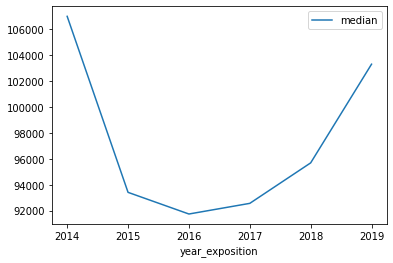

In [22]:
year_exposition_table = data.pivot_table(index = 'year_exposition', values = 'm2_price', aggfunc = ['mean', 'count', 'median'])
year_exposition_table.columns = ['mean', 'count', 'median']
year_exposition_table.plot(y = 'median')
year_exposition_table.sort_values('median', ascending = False)

Вывод: в 2014 году была самая большая стоимость квартир, затем она падает где минимум 2016 год и опять начинаеть подниматься.

# Выведем 10 населённых пунктов с наибольшим числом объявлений.

In [23]:
#print(data['locality_name'].value_counts().head(10))

locality_table = data.pivot_table(index = 'locality_name', values = 'm2_price', aggfunc=['count', 'mean'])
#print(locality_table.head(10))
locality_table.columns = ['count', 'mean']
#print(locality_table.head(10))
locality_table = locality_table.sort_values('count', ascending = False).head(10)
#самая высокая стоимость
print(locality_table[locality_table['mean']==locality_table['mean'].max()])
#самая низкая стоимость
print(locality_table[locality_table['mean']==locality_table['mean'].min()])
print(locality_table.head(10))


                 count           mean
locality_name                        
Санкт-Петербург  15721  114849.007812
               count          mean
locality_name                     
Выборг           237  58141.910156
                   count           mean
locality_name                          
Санкт-Петербург    15721  114849.007812
посёлок Мурино       522   85752.187500
посёлок Шушары       440   78677.367188
Всеволожск           398   68654.476562
Пушкин               369  103125.820312
Колпино              338   75424.578125
посёлок Парголово    327   90175.914062
Гатчина              307   68746.148438
деревня Кудрово      299   92473.546875
Выборг               237   58141.910156


Вывод: Самая высокое количество продаж в Санкт-Петербурге, самая низкая в Выборге.

# Определим какие квартиры могут входить в центр

<AxesSubplot:xlabel='cityCenters_nearest_km'>

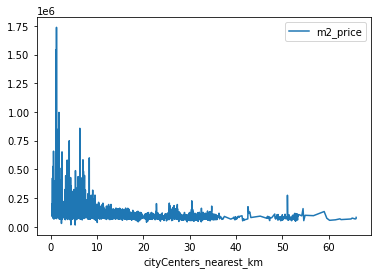

In [24]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest']/1000
#print(data['cityCenters_nearest_km'].head(10))
Piter = data.query('locality_name == "Санкт-Петербург"')
Piter = data.pivot_table(index = 'cityCenters_nearest_km', values = 'm2_price', aggfunc = 'mean')
Piter.plot()

Вывод:судя по графику,для точности берем 7 км расстоянием до центра.

# Выделим квартиры в Санкт-Петербурге, в центре и произведем расчеты

In [25]:
#выделим квартиры в центре, беря за радиус 7 км
Piter_centr = data.query('cityCenters_nearest_km <= 7 and locality_name == "Санкт-Петербург"')
display(Piter_centr.head(10))


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,m2_price,day_exposition,month_exposition,year_exposition,floor_total_category,liv_total_area,kit_total_area,cityCenters_nearest_km
3,0,64900000.0,159.000000,2015-07-24,3,NaN,14.0,NaN,9,0,...,234.0,424.0,408176.093750,4,7,2015,другой,NaN,NaN,6.800
24,8,6500000.0,97.199997,2015-10-31,2,NaN,3.0,46.500000,1,0,...,124.0,265.0,66872.429688,5,10,2015,первый,0.478395,0.201646,2.336
35,6,15500000.0,149.000000,2017-06-26,5,NaN,5.0,104.000000,4,0,...,779.0,644.0,104026.843750,0,6,2017,другой,0.697987,0.114094,3.502
51,7,45000000.0,161.000000,2017-10-17,3,3.2,8.0,38.000000,4,0,...,99.0,541.0,279503.093750,1,10,2017,другой,0.236025,0.310559,6.589
52,20,11795000.0,136.000000,2017-09-22,6,3.0,2.0,94.000000,2,0,...,NaN,NaN,86727.937500,4,9,2017,последний,0.691176,0.080882,6.582
61,18,7990000.0,74.000000,2017-08-24,2,NaN,4.0,43.000000,4,0,...,NaN,609.0,107972.976562,3,8,2017,последний,0.581081,0.270270,4.288
63,2,20000000.0,118.000000,2018-09-11,3,3.0,9.0,68.000000,7,0,...,779.0,37.0,169491.531250,1,9,2018,другой,0.576271,0.135593,4.800
99,32,9600000.0,90.000000,2017-09-26,4,NaN,5.0,67.000000,2,0,...,NaN,104.0,106666.664062,1,9,2017,другой,0.744444,0.088889,2.818
106,9,10500000.0,124.099998,2017-05-25,5,3.2,4.0,79.400002,3,0,...,NaN,6.0,84609.187500,3,5,2017,другой,0.639807,0.161160,5.527
111,4,4590000.0,40.000000,2017-05-29,1,NaN,6.0,18.000000,1,0,...,NaN,31.0,114750.000000,0,5,2017,первый,0.450000,0.250000,6.175


# Зависимость от количества комнат

,mean,count,median
rooms,,,
1,154891.359375,477,143750.000000
2,142549.078125,962,126094.968750
3,143165.906250,1015,117235.773438
7,167223.468750,54,109996.062500
4,137841.375000,466,108268.234375
5,145011.140625,214,104158.804688
6,153676.484375,81,103361.343750


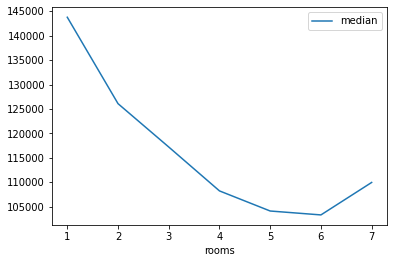

In [26]:
Piter_centr_rooms = Piter_centr.pivot_table(index = 'rooms', values = 'm2_price', aggfunc = ['mean', 'count', 'median'])
Piter_centr_rooms.columns = ['mean', 'count', 'median']
Piter_centr_rooms.query('count>30').plot(y = 'median')
Piter_centr_rooms.query('count>30').sort_values('median', ascending = False)

Вывод: с увеличением количества комнат стоимость жилья снижаеться. Минимальная цена 6 комнат.

# Зависимость от этажа

,mean,count,median
floor_total_category,,,
первый,122682.937500,371,109457.093750
последний,144072.203125,603,116666.664062
другой,148472.875000,2331,127551.023438


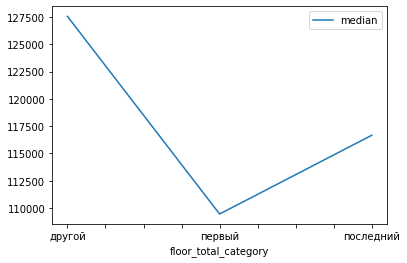

In [27]:
Piter_centr_floor = Piter_centr.pivot_table(index = 'floor_total_category', values = 'm2_price', aggfunc = ['mean', 'count', 'median'])
Piter_centr_floor.columns = ['mean', 'count', 'median']
Piter_centr_floor.plot(y = 'median')
Piter_centr_floor.sort_values('median', ascending = True)
#print(Piter_centr_floor)

Вывод: Самые дорогие квартиры с этажностью другие, самые дешевые на первом этаже.

# Зависимость от удаленности от центра

-0.029526771783103457


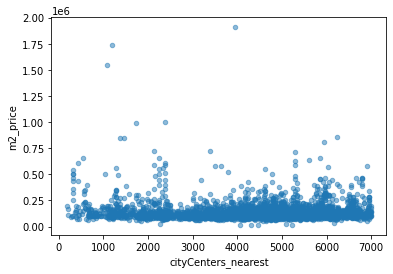

In [28]:
Piter_centr.plot(kind = 'scatter', y = 'm2_price', x = 'cityCenters_nearest', alpha = 0.5)
print(Piter_centr['m2_price'].corr(Piter_centr['cityCenters_nearest']))

Вывод: В пределах 7км все квартиры примерно стоят одинаково.

# Зависимость от дня недели

,mean,count,median
day_exposition,,,
6,147600.718750,180,129279.687500
5,155972.250000,237,128703.703125
0,144265.453125,510,126325.421875
4,143627.062500,557,125000.000000
2,142758.578125,586,124586.750000
3,145014.671875,681,120578.773438
1,142527.921875,554,118748.320312


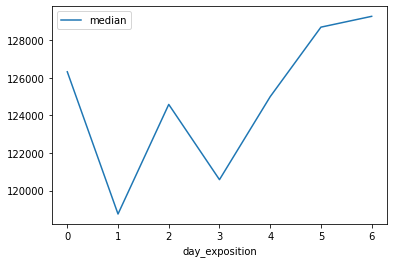

In [29]:
Piter_centr_day = Piter_centr.pivot_table(index = 'day_exposition', values = 'm2_price', aggfunc = ['mean', 'count', 'median'])
Piter_centr_day.columns = ['mean', 'count', 'median']
Piter_centr_day.plot(y = 'median')
Piter_centr_day.sort_values('median', ascending = False)

Вывод: Самые высокие цены в субботу и воскресенье, минимальная цена во вторник.

# Зависимость от месяца

,mean,count,median
month_exposition,,,
3,147665.875000,351,130333.335938
1,147892.187500,204,129334.851562
4,156002.515625,311,127574.156250
8,146001.171875,239,125000.000000
9,146258.625000,288,124052.437500
10,140581.078125,271,123497.992188
11,142519.671875,333,123333.335938
5,135036.531250,183,122077.921875
12,149976.203125,231,121328.218750


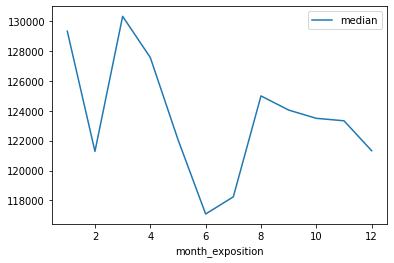

In [30]:
Piter_centr_month = Piter_centr.pivot_table(index = 'month_exposition', values = 'm2_price', aggfunc = ['mean', 'count', 'median'])
Piter_centr_month.columns = ['mean', 'count', 'median']
Piter_centr_month.plot(y = 'median')
Piter_centr_month.sort_values('median', ascending = False)

Вывод: В январе и марте самые высокие цены, минимальная цена в июне месяце.

# Зависимость от года

,mean,count,median
year_exposition,,,
2014,195654.453125,27,143465.546875
2019,162670.703125,356,136305.218750
2018,141078.328125,990,124875.000000
2017,143165.406250,1180,121260.859375
2015,147424.796875,297,119568.101562
2016,138241.453125,455,116784.843750


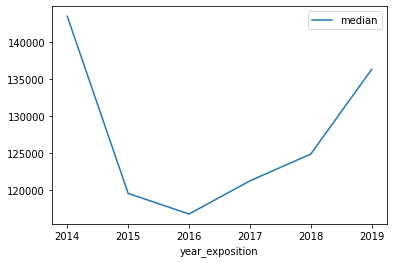

In [31]:
Piter_centr_year = Piter_centr.pivot_table(index = 'year_exposition', values = 'm2_price', aggfunc = ['mean', 'count', 'median'])
Piter_centr_year.columns = ['mean', 'count', 'median']
Piter_centr_year.plot(y = 'median')
Piter_centr_year.sort_values('median', ascending = False)

Вывод: В 2014 году были самые высокие цены, минимальные цены в 2016 году,затем они начали расти.

## Общий вывод

Обработал полученный архив данных, заменил пропущенные значения, заменил типы данных где это требовалось для облегчения работы. Изучили следующие параметрры - площадь, цена, число комнат, высота потолков. Были определены аномалии. Были даты на которых были большое количество снятых обьявление, мы исключили эти данные.На стоимость квартиры большего всего влияют этажность, количество комнат и близость к центру.



В общем графике квартиры с 3 мя комнатами имеет меньшую стоимость.В Санкт-Петербурге с увеличением количества комнат стоимость жилья снижаеться. Минимальная цена 6 комнат.

Стоимость квартир по этажам совпадает в общем графике и в Санкт-Петербурге.

В общем графике чем ближе к центру, тем выше стоимость стоимость квадрратного метра. В Санкт-Петербурге пределах 7км все квартиры примерно стоят одинаково.

В общем графике обьявлений во вторник самая высокая цена, самая низкая в субботу. В Санкт-Петербурге высокие цены в субботу и воскресенье, минимальная цена во вторник.

В общем графике самое большая стоимость в апреле, а самое низкое в мае и июне. В Санкт-Петербурге самая высокая стоимость в январе и марте, минимальная цена в июне месяце.

Стоимость квартир по годам совпадает в общем графике и в Санкт-Петербурге. 